# 第一次恒星物理编程作业

# analytically

## m-r图

### 由$\rho(r)=\rho_{c}[1-(\frac{r}{R})^2], m(r)=\int_{0}^{r}4\pi r^{2}\rho(r)dr$以及边界条件$m(R)=M$<br/>$\Rightarrow m(r)=4\pi \rho_{c}r^{3}(\frac{1}{3}-\frac{r^{2}}{5R^{2}})\,\,\,\Rightarrow \rho_{c}=\frac{15M}{8\pi R^{3}}$<br/>$\Rightarrow m(r)=\frac{15M}{2}(\frac{r}{R})^{3}[\frac{1}{3}-\frac{1}{5}(\frac{r^{2}}{R^{2}})]$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
r = np.linspace(0,1,200) ##归一化的径向网格点
m_ana = np.zeros(200) ##r的归一化处质量

In [3]:
m_ana = 15/2*(r**3)*(1/3-1/5*(r**2))

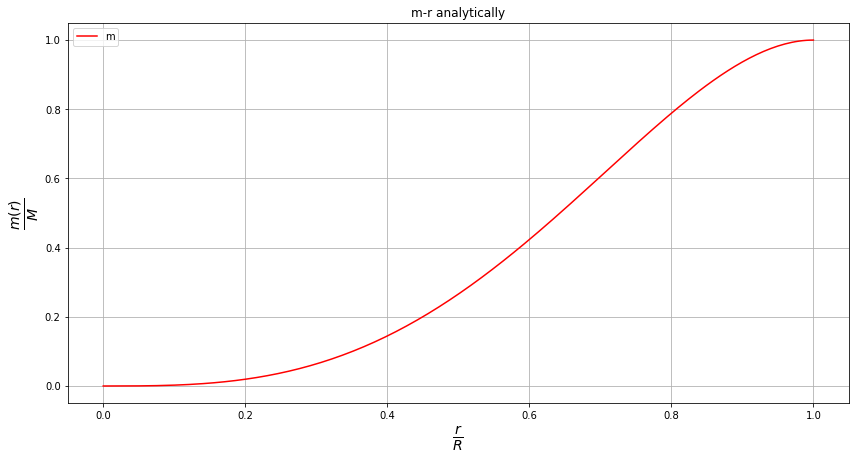

In [4]:
plt.figure(figsize=(14,7))
plt.plot(r,m_ana,'r',label='m')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{m(r)}{M}$',fontsize=20)
plt.grid()
plt.title('m-r analytically')
plt.legend()
#plt.savefig('mass.pdf',dpi=600)
plt.show()

## $\Omega_{s}$-r图

### $\Omega_{s}=-\int_{0}^{m(r)}\frac{Gmdm}{r}\,\,\,\Rightarrow\Omega_{s}=-\frac{15}{4}\frac{GM^2}{R}[(\frac{r}{R})^5-\frac{8}{7}(\frac{r}{R})^7+\frac{1}{3}(\frac{r}{R})^9]$ 

In [5]:
omega_ana = np.zeros(200)  #r处的归一化引力势能

In [6]:
omega_ana = 15/4*(r**5-8/7*(r**7)+1/3*(r**9))

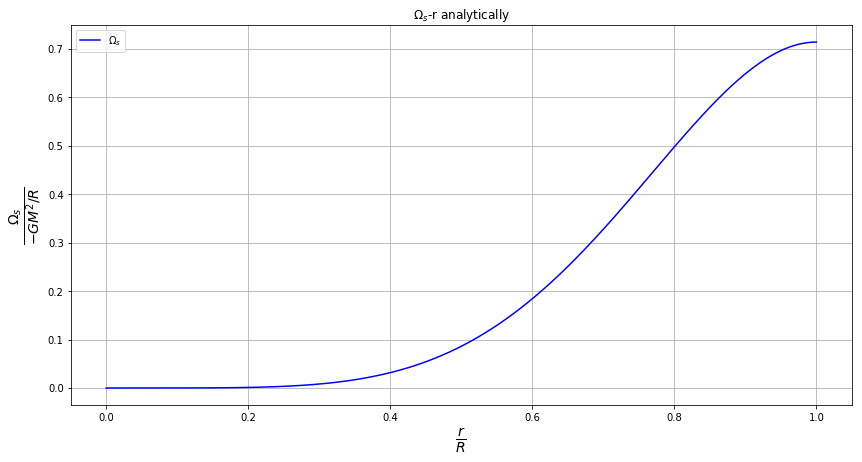

In [7]:
plt.figure(figsize=(14,7),)
plt.plot(r,omega_ana,'b',label='$\Omega_{s}$')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{\Omega_{s}}{-GM^2/R}$',fontsize=20)
plt.grid()
plt.title('$\Omega_{s}$-r analytically')
plt.legend()
#plt.savefig('omega.pdf',dpi=600)
plt.show()

# numerically 

## m-r

### $m(r)=\int_{0}^{r}4\pi r^{2}\rho(r)dr=\int_{0}^{r}4\pi r^{2}\rho_{c}[1-(\frac{r}{R})^{2}]dr=\int_{0}^{r}4\pi r^{2}\frac{15M}{8\pi R^{3}}[1-(\frac{r}{R})^{2}]dr=\int_{0}^{1} \frac{15M}{2}(\frac{r}{R})^2[1-(\frac{r}{R})^2]d\frac{r}{R}$<br/>$\Rightarrow \frac{m(r)}{M}=\int_{0}^{1}\frac{15}{2}x^{2}(1-x^2)dx$

采用复化梯形积分计算

In [8]:
def m_r(r):
    #归一化的
    m = 15/2*(r**2)*(1-r**2)
    return m

In [9]:
m_num = np.zeros(200)
h = 1./200  #复化梯形积分的步长

In [10]:
m_num[0] = 0.5*m_r(r[0])
for i in np.arange(1,len(m_num)-1):
    m_num[i] = m_num[i-1] + m_r(r[i])
m_num[-1] = m_num[-2] + 0.5*m_r(r[-1])
m_num = m_num*h

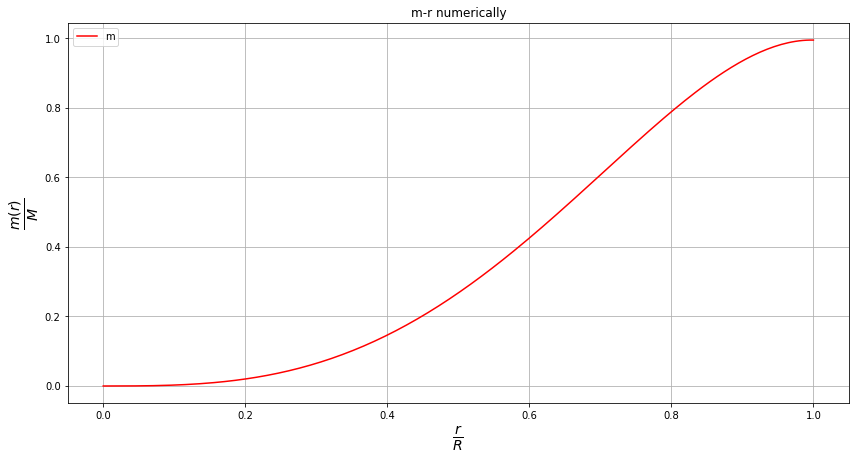

In [11]:
plt.figure(figsize=(14,7))
plt.plot(r,m_num,'r',label='m')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{m(r)}{M}$',fontsize=20)
plt.grid()
plt.title('m-r numerically')
plt.legend()
#plt.savefig('mass.pdf',dpi=600)
plt.show()

## $\Omega_{s}-r$

### $\Omega_{s}=-\int_{0}^{m(r)}\frac{Gmdm}{r}=-\int_{0}^{r}\frac{Gm(r)}{r}4\pi r^{2}\frac{15M}{8\pi R^3}[1-(\frac{r}{R})^2]dr$<br/>$\Rightarrow \frac{\Omega_{s}}{-GM^2/R}=\int_{0}^{1}\frac{15m(r)r}{2MR}[1-(\frac{r}{R})^2]d\frac{r}{R}$

In [12]:
def omega_r(r,m,M):
    omega = 15/2*m/M*r*(1-r**2)
    return omega
    

In [13]:
M = m_num[-1]

In [14]:
omega_num = np.zeros(200)  #r处的归一化引力势能

In [15]:
omega_num[0] = 0.5*omega_r(r[0],m_num[0],M)
for i in np.arange(1,len(omega_num)-1):
    omega_num[i] = omega_num[i-1] + omega_r(r[i],m_num[i],M)
omega_num[-1] = omega_num[-2] + 0.5*omega_r(r[-1],m_num[-1],M)
omega_num = omega_num*h

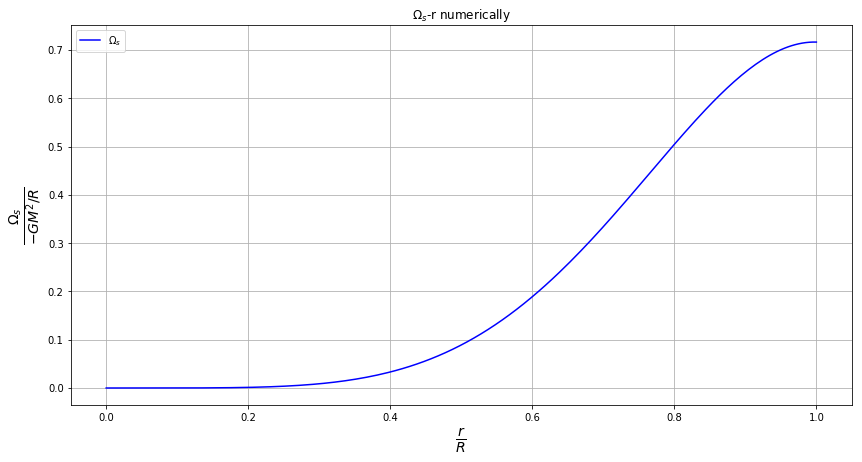

In [16]:
plt.figure(figsize=(14,7),)
plt.plot(r,omega_num,'b',label='$\Omega_{s}$')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{\Omega_{s}}{-GM^2/R}$',fontsize=20)
plt.grid()
plt.title('$\Omega_{s}$-r numerically')
plt.legend()
#plt.savefig('omega.pdf',dpi=600)
plt.show()